In [22]:
from build_df_from_json import build_combined_df

df = build_combined_df()
df

,umw,url,tytul,tresc,att_text,att_link,att_list_len,data_pub,data_mod,view_cnt,sub_tytul,public_name
0,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Decyzja Marszałka Województwa Łódzkiego z dnia...,Decyzja Marszałka Województwa Łódzkiego z dnia...,[ŚRIII.7222.59.2023.MS DECYZJA.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-29 00:00:00,NaT,42.0,NaN,NaN
1,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Budowa i...,Projekt „Budowa instalacji fotowoltaicznej na ...,None,None,0.0,2023-06-28 00:00:00,NaT,37.0,NaN,NaN
2,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Rozwój k...,Projekt „Rozwój kultury w Gminie Koluszki” zło...,None,None,0.0,2023-06-28 00:00:00,NaT,30.0,NaN,NaN
3,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Postanowienie dotyczące decyzji Marszałka Woje...,,[GKIII.7440.8.2022.EK.AM - postanowienie + wyk...,[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-27 00:00:00,NaT,65.0,NaN,NaN
4,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny merytorycznej projektu „Budo...,Projekt „Budowa i modernizacja oświetlenia pub...,None,None,0.0,2023-06-27 00:00:00,NaT,34.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2009,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_19...,"Uprawnienia właścicieli, użytkowników wieczyst...",I. Rodzaje uprawnień oraz tryb i termin dochod...,NaN,NaN,NaN,2016-04-18 09:22:42,NaT,NaN,NaN,NaN
2010,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Ogłoszenie naboru ofert na wykonanie przez upr...,Uchwała nr 994/15 Zarządu Województwa Wielkopo...,NaN,NaN,NaN,2015-09-08 07:52:13,NaT,NaN,NaN,NaN
2011,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Zapytanie ofertowe na realizację opracowania p...,Zapytanie ofertowe na realizację opracowania p...,NaN,NaN,NaN,2015-07-24 08:12:46,NaT,NaN,NaN,NaN
2012,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Plan Zrównoważonego Rozwoju Publicznego Transp...,Aktualizacja Planu Zrównoważonego Rozwoju Publ...,NaN,NaN,NaN,2015-02-18 08:13:31,2020-12-03 13:27:07,NaN,NaN,NaN


In [23]:
import spacy 

nlp = spacy.load('pl_core_news_sm')

In [24]:
df['tresc'].iloc[0]

'Decyzja Marszałka Województwa Łódzkiego z dnia 28 czerwca 2023 roku, znak: ŚRIII.7222.59.2023.MS w sprawie zmiany pozwolenia zintegrowanego '

In [25]:
doc = nlp(df['tresc'].iloc[0])

lemma_list = [token.pos_ for token in doc] 

print(lemma_list)

# for token in doc:
    # print(token.text, token.lemma_, token.pos_, token.is_stop)

['NOUN', 'NOUN', 'NOUN', 'ADJ', 'ADP', 'NOUN', 'ADJ', 'NOUN', 'ADJ', 'NOUN', 'PUNCT', 'NOUN', 'PUNCT', 'X', 'PUNCT', 'X', 'X', 'X', 'PUNCT', 'ADJ', 'PUNCT', 'PROPN', 'ADP', 'NOUN', 'NOUN', 'NOUN', 'ADJ']


In [26]:
from collections import Counter

counter = Counter(lemma_list)
# print(counter.most_common(1)[0][1])
print(counter.most_common(1)[0][1])

10


In [27]:
import pandas as pd

cols_nlp = ("text", "lemma", "POS", "explain", "stopword")
rows_nlp = []

for t in doc:
    row = [t.text, t.lemma_, t.pos_, spacy.explain(t.pos_), t.is_stop]
    rows_nlp.append(row)

df_nlp = pd.DataFrame(rows_nlp, columns=cols_nlp)

df_nlp

,text,lemma,POS,explain,stopword
0,Decyzja,decyzja,NOUN,noun,False
1,Marszałka,Marszałek,NOUN,noun,False
2,Województwa,Województwo,NOUN,noun,False
3,Łódzkiego,Łódzkiego,ADJ,adjective,False
4,z,z,ADP,adposition,True
5,dnia,dzień,NOUN,noun,False
6,28,28,ADJ,adjective,False
7,czerwca,czerwiec,NOUN,noun,False
8,2023,2023,ADJ,adjective,False
9,roku,rok,NOUN,noun,True


In [28]:
df_nlp['POS'].value_counts().idxmax()

'NOUN'

In [29]:
for index_all, row_all in df.iterrows():
    print(row_all)
    break

umw                                                 umw_lodzkiego
url             https://bip.lodzkie.pl/ogloszenia/komunikaty/i...
tytul           Decyzja Marszałka Województwa Łódzkiego z dnia...
tresc           Decyzja Marszałka Województwa Łódzkiego z dnia...
att_text                      [ŚRIII.7222.59.2023.MS DECYZJA.pdf]
att_link        [https://bip.lodzkie.pl/ogloszenia/komunikaty/...
att_list_len                                                  1.0
data_pub                                      2023-06-29 00:00:00
data_mod                                                      NaT
view_cnt                                                     42.0
sub_tytul                                                     NaN
public_name                                                   NaN
Name: 0, dtype: object


In [32]:
from collections import Counter

tmp_dict={}

for index_all, row_all in df.iterrows():
    try:
        doc = nlp(df['tresc'].iloc[index_all])

        words_list = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]        
        pos_list = [token.pos_ for token in doc if not token.is_stop and not token.is_punct] 

        counter_words = Counter(words_list)
        counter_pos = Counter(pos_list)

        
        tmp_dict[index_all] = {"most_com_wrd": counter_words.most_common(1)[0][0],
                               "most_com_wrd_cnt": counter_words.most_common(1)[0][1], 
                               "most_com_pos": counter_pos.most_common(1)[0][0],
                               "most_com_pos_cnt": counter_pos.most_common(1)[0][1]} 
    except:
        print(f'ERROR ON RECORD {index_all}')

tmp_df = pd.DataFrame(tmp_dict).T

nlp_df = pd.merge(df, tmp_df, left_index=True, right_index=True)

ERROR ON RECORD 3
ERROR ON RECORD 5
ERROR ON RECORD 8
ERROR ON RECORD 29
ERROR ON RECORD 47
ERROR ON RECORD 51
ERROR ON RECORD 60
ERROR ON RECORD 61
ERROR ON RECORD 63
ERROR ON RECORD 65
ERROR ON RECORD 66
ERROR ON RECORD 67
ERROR ON RECORD 76
ERROR ON RECORD 77
ERROR ON RECORD 78
ERROR ON RECORD 91
ERROR ON RECORD 149
ERROR ON RECORD 180
ERROR ON RECORD 238
ERROR ON RECORD 240
ERROR ON RECORD 241
ERROR ON RECORD 369
ERROR ON RECORD 414
ERROR ON RECORD 452
ERROR ON RECORD 453
ERROR ON RECORD 461
ERROR ON RECORD 464
ERROR ON RECORD 466
ERROR ON RECORD 491
ERROR ON RECORD 492
ERROR ON RECORD 493
ERROR ON RECORD 494
ERROR ON RECORD 495
ERROR ON RECORD 517
ERROR ON RECORD 518
ERROR ON RECORD 519
ERROR ON RECORD 520
ERROR ON RECORD 523
ERROR ON RECORD 541
ERROR ON RECORD 542
ERROR ON RECORD 545
ERROR ON RECORD 546
ERROR ON RECORD 547
ERROR ON RECORD 548
ERROR ON RECORD 549
ERROR ON RECORD 550
ERROR ON RECORD 551
ERROR ON RECORD 553
ERROR ON RECORD 554
ERROR ON RECORD 555
ERROR ON RECORD 556

In [33]:
nlp_df 

,umw,url,tytul,tresc,att_text,att_link,att_list_len,data_pub,data_mod,view_cnt,sub_tytul,public_name,most_com_wrd,most_com_wrd_cnt,most_com_pos,most_com_pos_cnt
0,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Decyzja Marszałka Województwa Łódzkiego z dnia...,Decyzja Marszałka Województwa Łódzkiego z dnia...,[ŚRIII.7222.59.2023.MS DECYZJA.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-29 00:00:00,NaT,42.0,NaN,NaN,2023,2,NOUN,9
1,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Budowa i...,Projekt „Budowa instalacji fotowoltaicznej na ...,None,None,0.0,2023-06-28 00:00:00,NaT,37.0,NaN,NaN,01,2,NOUN,14
2,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny formalnej projektu „Rozwój k...,Projekt „Rozwój kultury w Gminie Koluszki” zło...,None,None,0.0,2023-06-28 00:00:00,NaT,30.0,NaN,NaN,Gmina,2,NOUN,11
4,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Zakończenie oceny merytorycznej projektu „Budo...,Projekt „Budowa i modernizacja oświetlenia pub...,None,None,0.0,2023-06-27 00:00:00,NaT,34.0,NaN,NaN,03,2,NOUN,16
6,umw_lodzkiego,https://bip.lodzkie.pl/ogloszenia/komunikaty/i...,Obwieszczenie o wydanej dla ZGO AQUARIUM Sp. z...,Obwieszczenie o wydanej dla ZGO AQUARIUM Sp. z...,[obwieszczenie ŚRIII.7222.128.2022.ML.pdf],[https://bip.lodzkie.pl/ogloszenia/komunikaty/...,1.0,2023-06-26 00:00:00,NaT,17.0,NaN,NaN,obwieszczeni,1,NOUN,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_19...,"Uprawnienia właścicieli, użytkowników wieczyst...",I. Rodzaje uprawnień oraz tryb i termin dochod...,NaN,NaN,NaN,2016-04-18 09:22:42,NaT,NaN,NaN,NaN,nieruchomość,11,NOUN,265
2010,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Ogłoszenie naboru ofert na wykonanie przez upr...,Uchwała nr 994/15 Zarządu Województwa Wielkopo...,NaN,NaN,NaN,2015-09-08 07:52:13,NaT,NaN,NaN,NaN,2015,3,NOUN,15
2011,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Zapytanie ofertowe na realizację opracowania p...,Zapytanie ofertowe na realizację opracowania p...,NaN,NaN,NaN,2015-07-24 08:12:46,NaT,NaN,NaN,NaN,ofertowy,2,NOUN,14
2012,umw_wielkopolskiego,https://bip.umww.pl/292---k_332---k_287---k_18...,Plan Zrównoważonego Rozwoju Publicznego Transp...,Aktualizacja Planu Zrównoważonego Rozwoju Publ...,NaN,NaN,NaN,2015-02-18 08:13:31,2020-12-03 13:27:07,NaN,NaN,NaN,rok,10,NOUN,150


In [50]:
nlp_df1 = nlp_df.loc[nlp_df['umw'] == 'umw_lodzkiego']

# len(nlp_df1.most_com_wrd.unique().tolist())
nlp_df1.duplicated('most_com_wrd')

0      False
1      False
2      False
4      False
6      False
       ...  
445     True
446     True
447     True
448    False
449     True
Length: 427, dtype: bool

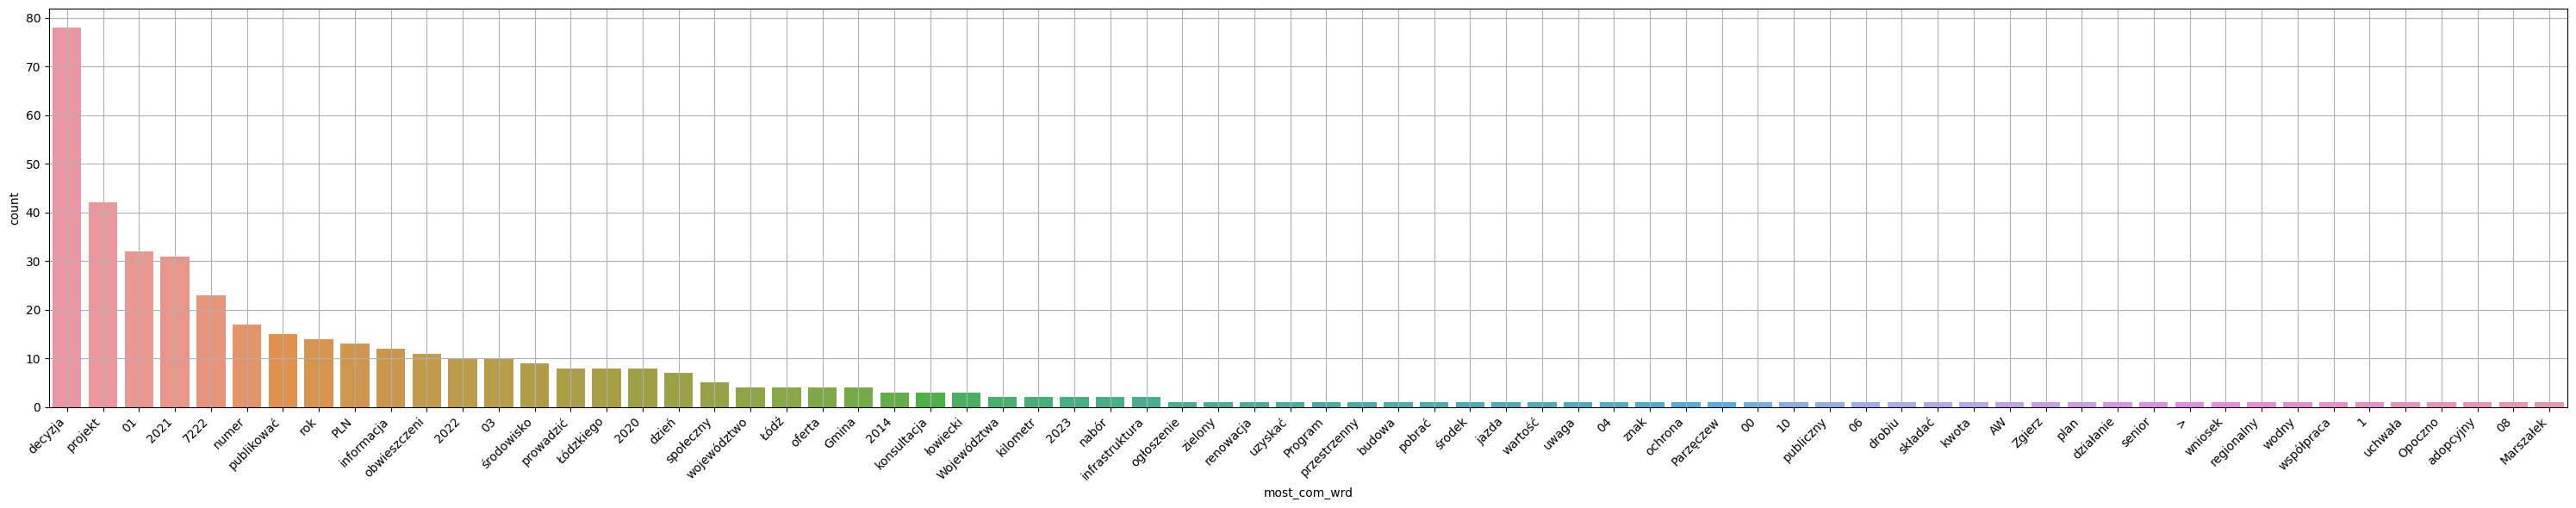

In [55]:
# nlp_df[nlp_df.duplicated('most_com_wrd')]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 6))

# ax = sns.barplot(x='most_com_wrd', y='liczba uzycia', data=nlp_df1, palette='viridis')

sns.countplot(x=nlp_df1['most_com_wrd'], order=nlp_df1['most_com_wrd'].value_counts().index)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid()
plt.show()